# TKT4108 - Structural Dynamics 2
## Example - Earthquake Analysis and EC8

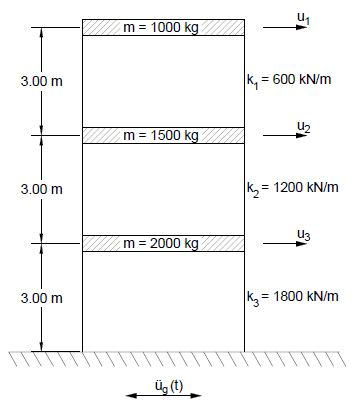

### Calculate the earthquake response of the building shown in the figure above and with the following properties, by (1) Modal Analysis and (2) EC 8 procedure

Building located in Oslo: $a_{g}$ = 0.30  
Soil Type: A  
Importance class: $\gamma_{I}$ = 1  
Behaviour factor: q = 1.5

In [1]:
import numpy as np

import scipy.linalg as linalg
import matplotlib.pyplot as plt

# Building Properties
k_1 = 600e+3    # stifness in N/m units
m_1 = 1000      # mass in kg
q = 1.5         # behaviour factor
a_g = 0.30      # ground acceleration
L = 3.00        # height between storeys

### Part 1: Modal Analysis
**The first step of the solution consists on assembling the system stiffness and mass matrices.**  
$$ K = k_{1}\begin{bmatrix} 1 & -1 & 0 \\ -1 & 3 & -2 \\ 0 & -2 & 5 \end{bmatrix}; M = m_{1}\begin{bmatrix} 1 & 0 & 0 \\ 0 & 1.5 & 0 \\ 0 & 0 & 2 \end{bmatrix}$$

In [2]:
# System Matices
K = k_1 * np.array([[1,-1,0],[-1,3,-2],[0,-2,5]])   # stifnees matrix
M = m_1 * np.array([[1,0,0],[0,1.5,0],[0,0,2]])     # mass matrix
T = [1,1,1]     # influence vector (Chopra pg. 385)

**Next, the eigenvalue solution is applied obtaining modes and mode shapes of the system**
$$[K - \Omega^{2} M]\Phi = 0$$

In [3]:
# Eigenvale Analysis
lambd, phi = linalg.eig(K, b=M)   
wn = np.sqrt(lambd.real)    # natural circular frequency
Tn = 2*np.pi/wn             # natural period
phi = phi/phi[0,:]          # normalizing shapes

print('The natural circular frequencies are')
print(str(np.around(wn,2)) + ' rad/s')
print( )
print('Then, the natural periods are')
print(str(np.around(Tn,3)) + ' s')
print( )
print('With the corresponding mode shapes')
print(np.around(phi,3))

The natural circular frequencies are
[14.52 31.05 46.1 ] rad/s

Then, the natural periods are
[0.433 0.202 0.136] s

With the corresponding mode shapes
[[ 1.     1.     1.   ]
 [ 0.649 -0.607 -2.542]
 [ 0.302 -0.679  2.44 ]]


**The modal analysis to follow is based on the next equations**
$$M \ddot U^{t} + C \dot U + KU = 0$$
$U ^{t}$ is the total displacement vector and $U $ is the relative displacement vector:  
$$U ^{t} = U + TU_{g}$$
In our case (horizontal excitation of a shear frame), the influence vector (Chopra section 9.4) is: $T = [1,1,1]^{T}$  
Then: 
$$M \ddot U + C \dot U + KU = -MT\ddot U_{g}$$
For simplicity $C \dot U$ is not shown from here on.  
By modal expansion of displacements (Chopra section 10.7):
$$U =\sum_{i=1}^{N} q_{i} \phi_{i} \tag{1}$$
The modal equation of moption results in (Chopra section 13.1):
$$m_{i} \ddot q_{i} + k_{i}q_{i} = -\phi_{i}^{T}MT \ddot U_{g} = -l_{i} \ddot U_{g}$$
$$\ddot q_{i} + \omega_{i}^2q_{i} = -\frac{l_{i}}{m_{i}} \ddot U_{g} = -\gamma_i \ddot U_{g}$$
where:  
$\omega_{i}^2 = \frac{k_{i}}{m_{i}};m_{i}=\phi_{i}^{T}M\phi_{i};k_{i}=\phi_{i}^{T}K\phi_{i};l_{i}=\phi_{i}^{T}MT$

Considering an earthquake with acceleration response spectrum $S_{a}$ we get:
$$q_{i,max} = \gamma_i \frac{1}{\omega_{i}^{2}}S_{a,i} \tag{2}$$
$S_{a,i}$ is the value of the response spectrum for the natural period $T_{i} = \frac{2\pi}{\omega_{i}}$ of mode $i$  
The forces at each degree of freedom (DOF) in mode $i$ are:
$$(F_{s})_{i}= KU_{i} = K\phi_{i}q_{i} = \omega^{2}M\phi_{i}q_{i}$$
By Using equation (2):
$$(F_{s})_{i,max} = \omega^{2}M\phi_{i}q_{i,max} = \gamma_{i}S_{a,i}M\phi_{i} \tag{3}$$
The total force in mode $i$, equivalent to base shear per mode, is:
$$V_{base,i} = T^{T}(F_{s})_{i} = \frac{l_{i}^{2}}{m_{i}}S_{a,i}$$
In the base shear equation, the parameter $\frac{l_{i}^{2}}{m_{i}}$ is called **Effective Modal Mass** ($M_{i}^{eff}$). It tells the way the total mass is "distributed" in the modes.
Finally, in order to compute (combine) the maximum of any parameter the Square root of the sum of the squares (SRSS) rule can be Used (Chopra section 13.7.2). SSRSS states that if:
$$A = a+b+c+...+z$$
then:
$$A_{max} \approx \sqrt{a_{max}^{2}+b_{max}^{2}+c_{max}^{2}+...+z_{max}^{2}} \tag{4}$$

In [4]:
# Modal Properties
L_mod = phi.T @ M @ T           # modal expansion of the spatial distribution of effective earthquake forces (Chopra pg. 509)
M_mod = phi.T @ M @ phi         # modal mass matrix
M_eff = (L_mod**2) / (np.diag(M_mod))     # effective modal mas
gamma_mod = L_mod / np.diag(M_mod)        # modal participation factor

print('The modal masses are')
print(str(np.around(np.diag(M_mod),0)) + ' kg')
print( )
print('The modal expansion of the spatial distribution of effective earthquake forces is')
print(str(np.around(L_mod,0)) + ' kg') 
print( )
print('The modal participation factors are')
print(np.around(gamma_mod,2))
print( )
print('The effective modal masses are')
print(str(np.around(M_eff,0)) + ' kg')
print( )

The modal masses are
[ 1813.  2474. 22596.] kg

The modal expansion of the spatial distribution of effective earthquake forces is
[ 2577. -1268.  2066.] kg

The modal participation factors are
[ 1.42 -0.51  0.09]

The effective modal masses are
[3661.  650.  189.] kg



**The response spectrum is plotted and the corresponding normalized accelerations for each natural period are obtained.**

The maximum acceleration responses are
[0.289 0.5   0.5  ] m/s2



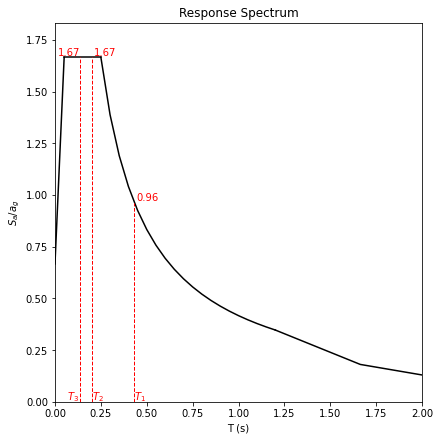

In [5]:
# Response Spectrum
T_spectrum = [0,0.05,0.25,1.2,10]       # Spectrum Parameters for A-type soil
S_0 = 1                                 # Spectrum Parameters for A-type soil
resp_spectrum = [lambda t: S_0*(2/3 + (t/T_spectrum[1])*(2.5/q - 2/3)),
                 lambda t: S_0*(2.5/q) if (isinstance(t, float)) else S_0*(2.5/q)*np.ones(len(t)),
                 lambda t: S_0*(2.5/q)*(T_spectrum[2]/t),
                 lambda t: S_0*(2.5/q)*((T_spectrum[2]*T_spectrum[3])/(t**2))]

# Seismic Response
S_a = np.zeros(Tn.shape)
for i_mode,Tn_i in enumerate(Tn):
    if Tn_i < T_spectrum[1]: 
        S_a[i_mode] = a_g * resp_spectrum[0](Tn_i)
    elif Tn_i > T_spectrum[1] and Tn_i < T_spectrum[2]:
        S_a[i_mode] = a_g * resp_spectrum[1](Tn_i)
    elif Tn_i > T_spectrum[2] and Tn_i < T_spectrum[3]:
        S_a[i_mode] = a_g * resp_spectrum[2](Tn_i)
    elif Tn_i > T_spectrum[3]:
        S_a[i_mode] = a_g * resp_spectrum[3](Tn_i)

        # Plotting the response spectrum
plt.figure(figsize=(6.00, 6.00),constrained_layout=True)
for i_curve in range(len(resp_spectrum)):
    t = np.linspace(T_spectrum[i_curve],T_spectrum[i_curve+1],20,endpoint=True)
    S_norm = resp_spectrum[i_curve](t)
    plt.plot(t,S_norm,'-k',lw=1.5)
for i_mode,Tn_i in enumerate(Tn):
        plt.vlines(x=Tn_i, ymin=0, ymax=S_a[i_mode]/a_g, color='red', linestyle='--',lw=1)
        if i_mode != len(Tn)-1:
            plt.text(x=Tn_i+0.01, y=S_a[i_mode]/a_g+0.01, s=str(np.round(S_a[i_mode]/a_g,2)), fontsize=10,color='red')
            plt.text(x=Tn_i, y=0.01, s='$T_{'+str(i_mode+1)+'}$', fontsize=10,color='red')
        else:
            plt.text(x=Tn_i-0.12, y=S_a[i_mode]/a_g+0.01, s=str(np.round(S_a[i_mode]/a_g,2)), fontsize=10,color='red')
            plt.text(x=Tn_i-0.07, y=0.01, s='$T_{'+str(i_mode+1)+'}$', fontsize=10,color='red')
plt.title('Response Spectrum')
plt.xlabel('T (s)')
plt.ylabel('$S_{a}/a_{g}$')
plt.xlim([0,2])
plt.ylim([0,1.1*resp_spectrum[1](T_spectrum[1])])

print('The maximum acceleration responses are')
print(str(np.around(S_a,3)) + ' m/s2')
print( )

**Having obtained the maximum acceleration responses with the response spectrum, the modal analysis and modal combination by SRSS is done:**

In [6]:
# Modal Analysis
eta_max = gamma_mod * S_a/(wn**2)       # max modal displacements
u_top = phi[0,:] * eta_max              # spatial displacements at top floor
u_top_max = np.sqrt(np.sum(u_top**2))   # combined displacement at top floor by SRSS
u_max_real = q * u_top_max
Fs_max = gamma_mod*S_a*(M @ phi)            # max forces in each DOF for each mode
F_max = np.sqrt(np.sum(Fs_max**2,axis=1))   # combined forces per DOF using SRSS

print('The maximum modal displacements are')
print(eta_max)
print( )
print('The maximum displacements at top floor for each mode are')
print(str(np.around(1000*u_top,2)) + ' mm')
print( )
print('The maximum displacement at top floor (combined using the SRSS rule)')
print(str(np.around(1000*u_top_max,2)) + ' mm')
print( )
print('Multiplying this displacement with the behaviour factor we obtain the real maximum diplacement at the top')
print(str(np.around(1000*u_max_real,2)) +' mm')
print( )
print('The maximum forces at each degree of freedom (rows) per mode (columns) are')
print(str(np.around(Fs_max,2)) +' N')
print( )
print('The forces combined at each degree of freedom by use of SRSS are')
print(str(np.around(F_max,2)) +' N')
print( )

The maximum modal displacements are
[ 1.94677971e-03 -2.65819524e-04  2.15157161e-05]

The maximum displacements at top floor for each mode are
[ 1.95 -0.27  0.02] mm

The maximum displacement at top floor (combined using the SRSS rule)
1.96 mm

Multiplying this displacement with the behaviour factor we obtain the real maximum diplacement at the top
2.95 mm

The maximum forces at each degree of freedom (rows) per mode (columns) are
[[ 410.53 -256.24   45.72]
 [ 399.37  233.15 -174.34]
 [ 247.84  347.96  223.1 ]] N

The forces combined at each degree of freedom by use of SRSS are
[486.09 494.22 481.95] N



### Part 2: Eurocode 8

**EC 8 procedure for "Simple structures"**  
First, the calculation of the fundamental period of the structure can be approximated by the following equation from section 4.3.3.2.2 of EC 8, if the building height is up to 40 m
$$T_1 = C_{t}H^{3/4} \tag{4.6}$$
$C_{t}$ is 0,085 for moment resistant space steel frames, 0,075 for moment resistant space concrete frames and for eccentrically braced steel frames and 0,050 for all other structures;  
$H$ is the height of the building, in m, from the foundation or from the top of a rigid basement.

In [7]:
# Simplified EC 8 procedure
c_t = 0.05                              # EC 8, section 4.3.3.2.2 Base shear force, equation (4.6)
lambda_ec8 = 1.00                       # EC 8, section 4.3.3.2.2 Base shear force, equation (4.5)
T1_ec8 = c_t*((3*L)**(3/4))             # fundamental period

print('The first natural period is')
print(str(np.around(T1_ec8,3)) + ' s')
print( )

The first natural period is
0.26 s



Next, the seismic base shear force is obtained by the following equation from section 4.3.3.2.2 of EC 8
$$F_{b} = S_{d}m\lambda \tag{4.5}$$
$S_{d}$ is the ordinate of the design spectrum $T_{1}$ calculated by equation (4.6)  
$m$ is the total mass of the building, above the foundation or above the top of a rigid basement  
$\lambda$ is the correction factor, the value of which is equal to $0,85$ if $T_1 < 2T_C$ and the building has more than two storeys, or $1,0$ otherwise.

The acceleration response for the obtained fundamental period is
0.481 m/s2

The seismic base shear is
2165.0 N



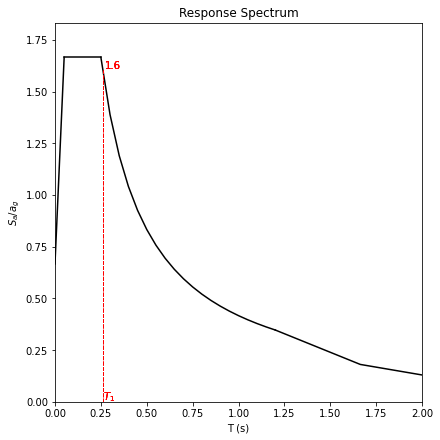

In [8]:
S_ec8 = a_g * resp_spectrum[2](T1_ec8)  # response spectrum
        # Plotting the response spectrum
plt.figure(figsize=(6.00, 6.00),constrained_layout=True)
for i_curve in range(len(resp_spectrum)):
    t = np.linspace(T_spectrum[i_curve],T_spectrum[i_curve+1],20,endpoint=True)
    S_norm = resp_spectrum[i_curve](t)
    plt.plot(t,S_norm,'-k',lw=1.5)
    plt.vlines(x=T1_ec8, ymin=0, ymax=S_ec8/a_g, color='red', linestyle='--',lw=1)
    plt.text(x=T1_ec8+0.01, y=S_ec8/a_g+0.01, s=str(np.round(S_ec8/a_g,2)), fontsize=10,color='red')
    plt.text(x=T1_ec8, y=0.01, s='$T_{1}$', fontsize=10,color='red')
plt.title('Response Spectrum')
plt.xlabel('T (s)')
plt.ylabel('$S_{a}/a_{g}$')
plt.xlim([0,2])
plt.ylim([0,1.1*resp_spectrum[1](T_spectrum[1])])

Fb_ec8 = S_ec8 * np.sum(np.diag(M)) * lambda_ec8

print('The acceleration response for the obtained fundamental period is')
print(str(np.around(S_ec8,3)) + ' m/s2')
print( )
print('The seismic base shear is')
print(str(np.around(Fb_ec8,0)) + ' N')
print( )

Finally, the seismic base shear force can be distributed along each storey by use of the following equation from section 4.3.3.2.3
$$F_{i} = F_{b}\frac{z_{i}m_{i}}{\sum{z_{j}m_{j}}} \tag{4.11}$$
$z_{i}$ and $z_{j}$ are the heights of the masses $m_{i}$ and $m_{j}$ above the level of application of the seismic action (foundation or top of a rigid basement).

In [9]:
Fmax_ec8 = Fb_ec8 * ((np.diag(M))*(np.array((3,2,1))*L)/np.sum((np.diag(M))*(np.array((3,2,1))*L)))

print('The distributed forces on each degree of freedom are')
print(str(np.around(Fmax_ec8,0)) +' N')
print( )

The distributed forces on each degree of freedom are
[812. 812. 541.] N

